Ejercicio 01: Predicción de Presión Arterial Sistólica usando Regresión Lineal
Objetivo: Desarrollar un modelo de regresión lineal simple y múltiple para predecir la presión arterial sistólica (PA) de pacientes, usando variables como la edad, el índice de masa corporal (IMC) y el nivel de colesterol.
Instrucciones:
1. Generación de Datos:

○ Simula un dataset de 300 pacientes con las siguientes variables:
-  edad: entre 18 y 80 años.
- imc: valores entre 18 y 38, siguiendo una distribución normal.
- colesterol: valores entre 130 y 300 mg/dL.
- pa_sistolica: variable dependiente, relacionada positivamente con edad, IMC y colesterol, más un componente aleatorio.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generar datos simulados
np.random.seed(42)
n = 300

edad = np.random.randint(18, 81, n)
imc = np.random.normal(28, 5, n)
colesterol = np.random.randint(130, 301, n)
pa_sistolica = 0.5 * edad + 0.3 * imc + 0.2 * colesterol + np.random.normal(0, 10, n)

# Crear DataFrame
df = pd.DataFrame({
    'edad': edad,
    'imc': imc,
    'colesterol': colesterol,
    'pa_sistolica': pa_sistolica
})

# Mostrar las primeras filas del DataFrame
df.head()

,edad,imc,colesterol,pa_sistolica
0,56,27.826441,291,109.645645
1,69,22.156610,247,94.567328
2,46,33.714114,132,56.038967
3,32,31.759665,252,84.219286
4,60,31.955160,179,88.256298


2. Exploración de Datos:
- Visualiza una muestra de los datos y obtén estadísticas descriptivas.
- Genera histogramas para analizar la distribución de cada variable.
- Crea una matriz de correlación para observar las relaciones entre variables.
- Realiza gráficos de dispersión entre la PA sistólica y cada variable independiente.

             edad         imc  colesterol  pa_sistolica
count  300.000000  300.000000  300.000000    300.000000
mean    50.533333   28.259690  211.173333     75.407033
std     18.916881    4.832515   48.524758     16.625728
min     18.000000   11.793663  130.000000     30.877705
25%     34.000000   24.517002  168.750000     63.487091
50%     51.500000   28.394197  208.000000     76.629804
75%     67.250000   31.332487  252.500000     86.247739
max     80.000000   47.263657  299.000000    126.229299


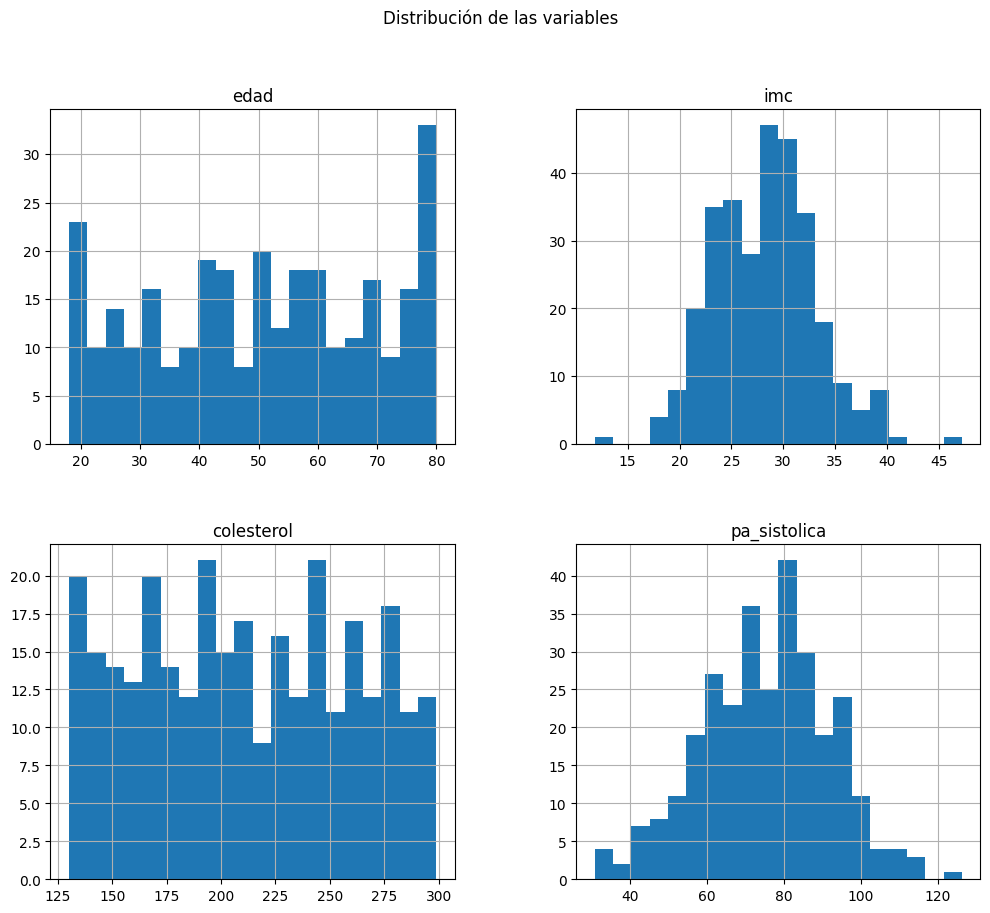

                  edad       imc  colesterol  pa_sistolica
edad          1.000000  0.094868   -0.091162      0.507868
imc           0.094868  1.000000   -0.070172      0.124512
colesterol   -0.091162 -0.070172    1.000000      0.533710
pa_sistolica  0.507868  0.124512    0.533710      1.000000


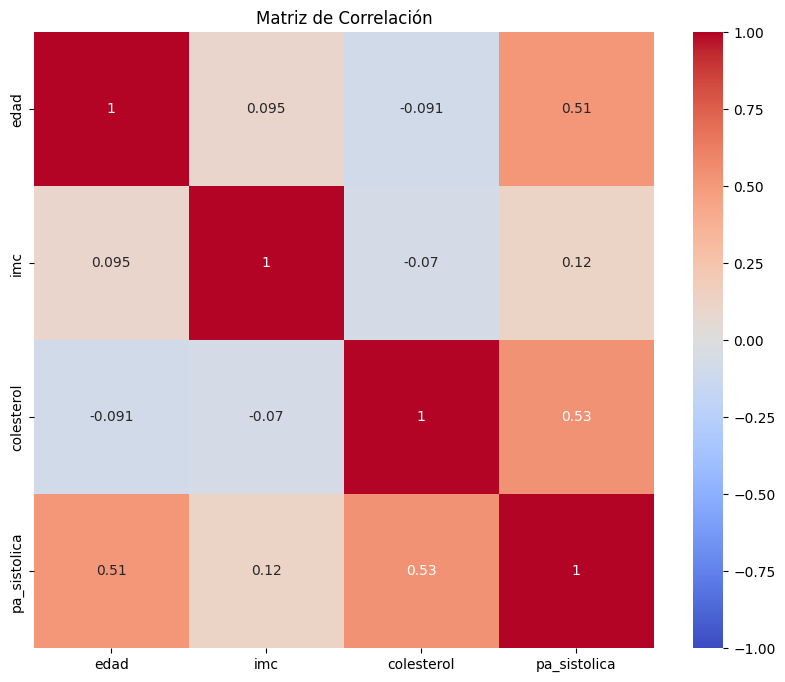

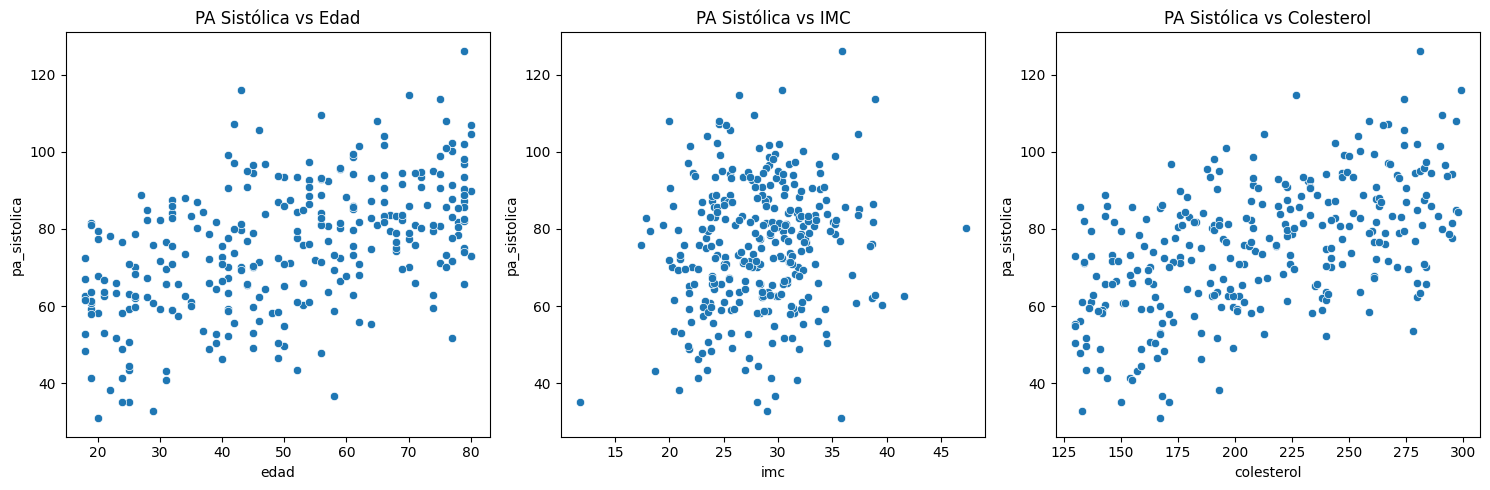

In [17]:
# Mostrar estadísticas descriptivas
print(df.describe())

# Generar histogramas para analizar la distribución de cada variable
df.hist(bins=20, figsize=(12, 10), )
plt.suptitle('Distribución de las variables')
plt.show()


# Crear una matriz de correlación
correlation_matrix = df.corr()
print(correlation_matrix)
# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


# Realizar gráficos de dispersión entre la PA sistólica y cada variable independiente
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='edad', y='pa_sistolica', data=df)
plt.title('PA Sistólica vs Edad')

plt.subplot(1, 3, 2)
sns.scatterplot(x='imc', y='pa_sistolica', data=df)
plt.title('PA Sistólica vs IMC')

plt.subplot(1, 3, 3)
sns.scatterplot(x='colesterol', y='pa_sistolica', data=df)
plt.title('PA Sistólica vs Colesterol')

plt.tight_layout()
plt.show()


3. Regresión Lineal Simple:
- Desarrolla un modelo de regresión lineal simple para cada predictor (edad, imc, colesterol) por separado.
- Divide los datos en conjunto de entrenamiento (70%) y prueba (30%).
- Entrena el modelo y realiza predicciones sobre el conjunto de prueba.
- Evalúa el modelo usando el Error Cuadrático Medio (MSE) y el coeficiente de determinación (R²).
- Visualiza la relación entre los valores reales y predichos para cada modelo.
- Usa una librería estadística para obtener el resumen del modelo y analizar significancia de coeficientes.

Resultados para edad: {'coeficiente': np.float64(0.44395235880596484), 'intercepto': np.float64(53.09622210266715), 'r2': 0.30460577961094293, 'mse': 179.18646966468373}


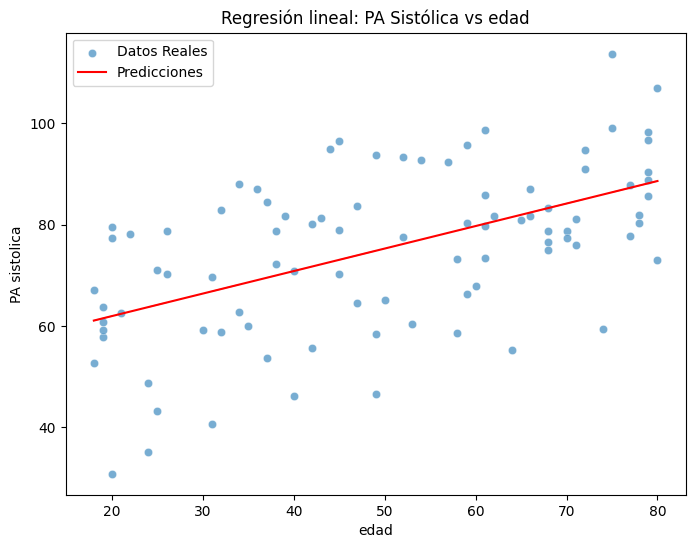

Resultados para imc: {'coeficiente': np.float64(0.5008156135139862), 'intercepto': np.float64(61.60669058672511), 'r2': 0.0007915129644721075, 'mse': 257.47214457824333}


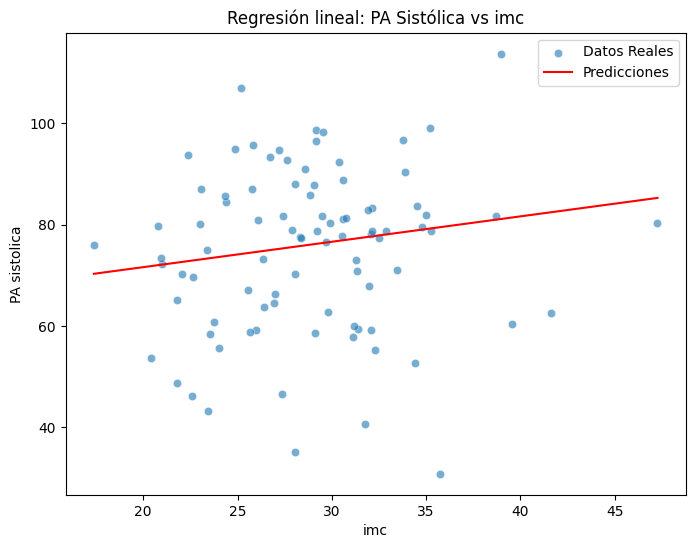

Resultados para colesterol: {'coeficiente': np.float64(0.19172484778665336), 'intercepto': np.float64(35.19155310027925), 'r2': 0.2149529376528534, 'mse': 202.28786420444294}


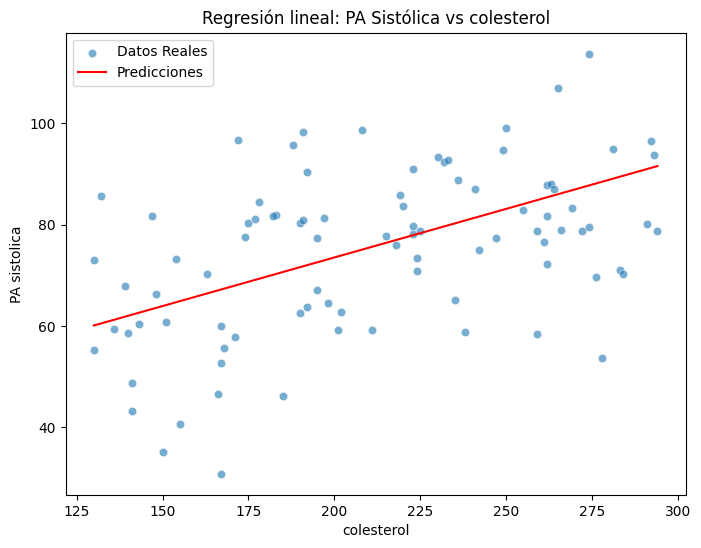

In [18]:
#Analisis de regresión lineal simple para cada variable
predictores = ['edad', 'imc', 'colesterol']
resultados = {}
for predictor in predictores:
    X = df[predictor].values.reshape(-1,1)
    y = df['pa_sistolica'].values

    #Dividimos el conjunto de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    #Creamos y entrenamos el modelo
    modelo= LinearRegression()
    modelo.fit(X_train, y_train)

    #Realizamos predicciones
    y_pred = modelo.predict(X_test)

    #Evaluamos el modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    #Guardamos los resultados
    resultados[predictor]= {
        'coeficiente': modelo.coef_[0],
        'intercepto': modelo.intercept_,
        'r2': r2,
        'mse': mse}
    print(f'Resultados para {predictor}:', resultados[predictor])
    

    #Visualizamos los resultados
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_test.flatten(), y=y_test, alpha=0.6, label='Datos Reales')
    sns.lineplot(x=X_test.flatten(), y=y_pred, color='red', label='Predicciones')
    plt.title(f'Regresión lineal: PA Sistólica vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('PA sistolica')
    plt.legend()
    plt.show()
    


Modelo de regresión lineal simple para Edad:
Error Cuadrático Medio (MSE): 179.19
Coeficiente de Determinación (R²): 0.30
                            OLS Regression Results                            
Dep. Variable:           pa_sistolica   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     65.39
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           5.00e-14
Time:                        12:42:29   Log-Likelihood:                -862.03
No. Observations:                 210   AIC:                             1728.
Df Residuals:                     208   BIC:                             1735.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------

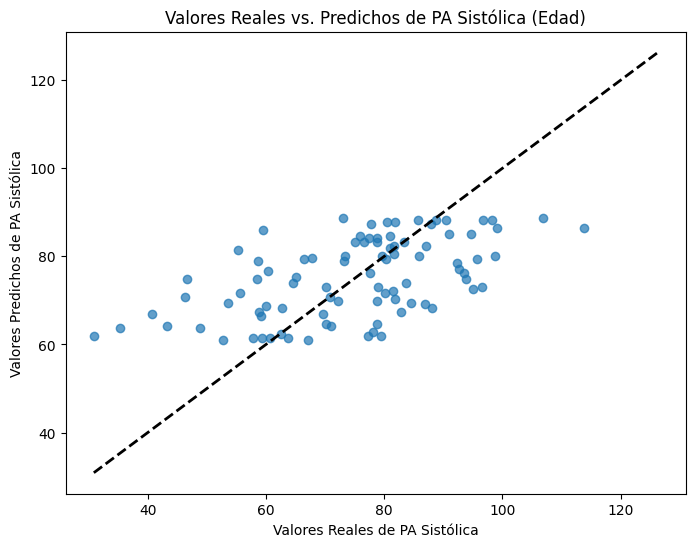

Modelo de regresión lineal simple para IMC:
Error Cuadrático Medio (MSE): 257.47
Coeficiente de Determinación (R²): 0.00
                            OLS Regression Results                            
Dep. Variable:           pa_sistolica   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     4.120
Date:                Wed, 12 Mar 2025   Prob (F-statistic):             0.0436
Time:                        12:42:30   Log-Likelihood:                -888.68
No. Observations:                 210   AIC:                             1781.
Df Residuals:                     208   BIC:                             1788.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

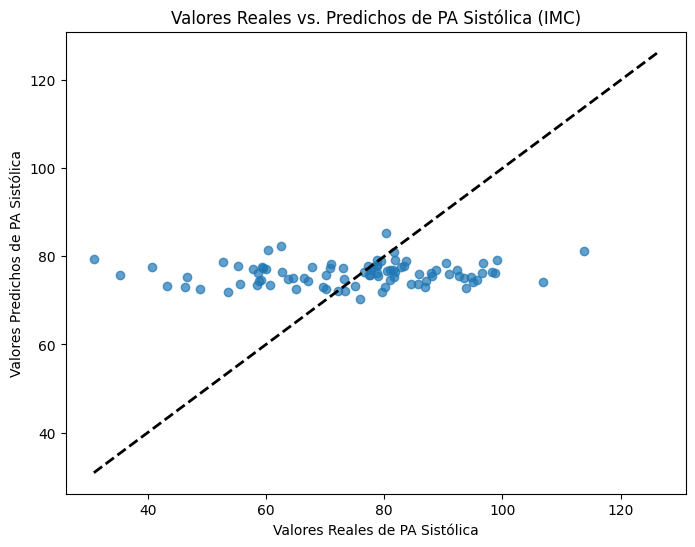

Modelo de regresión lineal simple para Colesterol:
Error Cuadrático Medio (MSE): 202.29
Coeficiente de Determinación (R²): 0.21
                            OLS Regression Results                            
Dep. Variable:           pa_sistolica   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     93.62
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           1.61e-18
Time:                        12:42:30   Log-Likelihood:                -851.71
No. Observations:                 210   AIC:                             1707.
Df Residuals:                     208   BIC:                             1714.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---

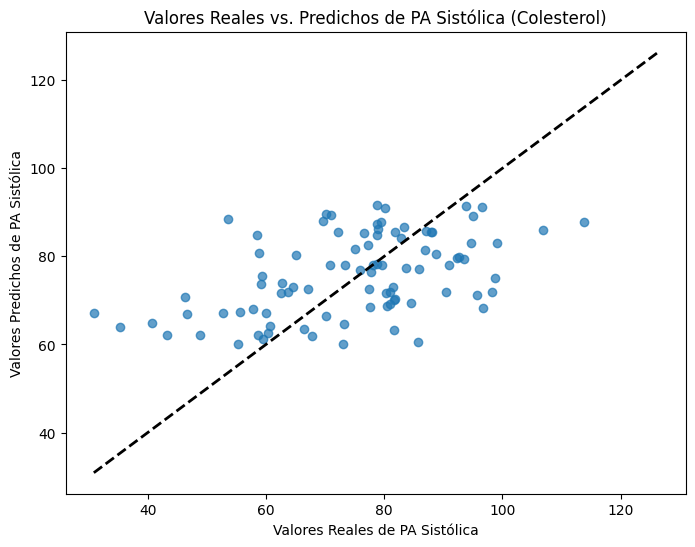

In [19]:
#OTRA FORMA DE HACERLO

from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Función para entrenar y evaluar un modelo de regresión lineal simple
def simple_linear_regression(X, y, predictor_name):
    # Dividir los datos en conjunto de entrenamiento (70%) y prueba (30%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Añadir una constante para el intercepto
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)
    
    # Entrenar el modelo
    model = sm.OLS(y_train, X_train_const).fit()
    
    # Realizar predicciones sobre el conjunto de prueba
    y_pred = model.predict(X_test_const)
    
    # Evaluar el modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Modelo de regresión lineal simple para {predictor_name}:")
    print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
    print(f"Coeficiente de Determinación (R²): {r2:.2f}")
    print(model.summary())
    
    # Visualizar la relación entre los valores reales y predichos
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel("Valores Reales de PA Sistólica")
    plt.ylabel("Valores Predichos de PA Sistólica")
    plt.title(f"Valores Reales vs. Predichos de PA Sistólica ({predictor_name})")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.show()

# Regresión lineal simple para cada predictor
simple_linear_regression(df[['edad']], df['pa_sistolica'], 'Edad')
simple_linear_regression(df[['imc']], df['pa_sistolica'], 'IMC')
simple_linear_regression(df[['colesterol']], df['pa_sistolica'], 'Colesterol')

4. Regresión Lineal Múltiple:
- Construye un modelo de regresión múltiple usando edad, imc y colesterol como predictores.
- Realiza el mismo procedimiento de división de datos, entrenamiento, predicción y evaluación.
- Obtén y analiza los coeficientes de cada variable.

In [20]:
#Regresión lineal múltiple

#preparamos los datos
X_multi = df[predictores]
y = df['pa_sistolica']

#Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.3, random_state=42)

#Creamos y entrenamos le modelo
modelo_multi = LinearRegression()
modelo_multi.fit(X_train, y_train)

#Realizamos las predicciones
y_pred_multi = modelo_multi.predict(X_test)

#Evaluamos el modelo
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print('\nResultados de regresión múltiple:')
print(f'MSE: {mse_multi:.2f}')
print(f'R²: {r2_multi:.2f}')
print('Coeficientes:', modelo_multi.coef_)
for i, predictor in enumerate(predictores):
    print(f'{predictor}: {modelo_multi.coef_[i]:.2f}')
    
print(f'Intercepto: {modelo_multi.intercept_}')






Resultados de regresión múltiple:
MSE: 113.30
R²: 0.56
Coeficientes: [0.49410523 0.37594252 0.21392352]
edad: 0.49
imc: 0.38
colesterol: 0.21
Intercepto: -5.096666272157478


In [21]:
#ANÁLSISIS ESTADÍSTICO CON STATSMODELS
X_sm_multi = sm.add_constant(X_train)
modelo_sm_multi = sm.OLS(y_train, X_sm_multi).fit()
print('\nResumen estadístico del modelo multiple:')
print(modelo_sm_multi.summary())



Resumen estadístico del modelo multiple:
                            OLS Regression Results                            
Dep. Variable:           pa_sistolica   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     115.5
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           6.77e-44
Time:                        12:52:16   Log-Likelihood:                -787.15
No. Observations:                 210   AIC:                             1582.
Df Residuals:                     206   BIC:                             1596.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

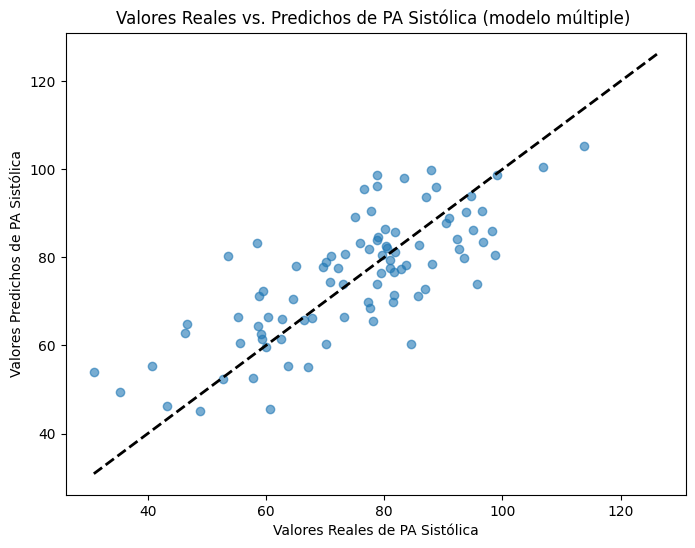

In [24]:
#VISUALIZACIÓN DE LAS PREDICCIONES VS VALORES REALES

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multi, alpha=0.6)
plt.xlabel("Valores Reales de PA Sistólica")
plt.ylabel("Valores Predichos de PA Sistólica")
plt.title(f"Valores Reales vs. Predichos de PA Sistólica (modelo múltiple) ")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

5. Evaluación de Modelos:

- Compara el desempeño de los modelos simples con el modelo múltiple.
-  Determina qué variable tiene mayor impacto en la predicción de la PA sistólica.
6. Visualización de Resultados:

- Grafica los residuos del modelo múltiple para verificar la distribución y homogeneidad.
- Compara gráficamente los valores predichos y reales.

7. Conclusiones:
- Interpreta los coeficientes y la importancia de cada variable.
- Discute las implicaciones clínicas de los resultados obtenidos.

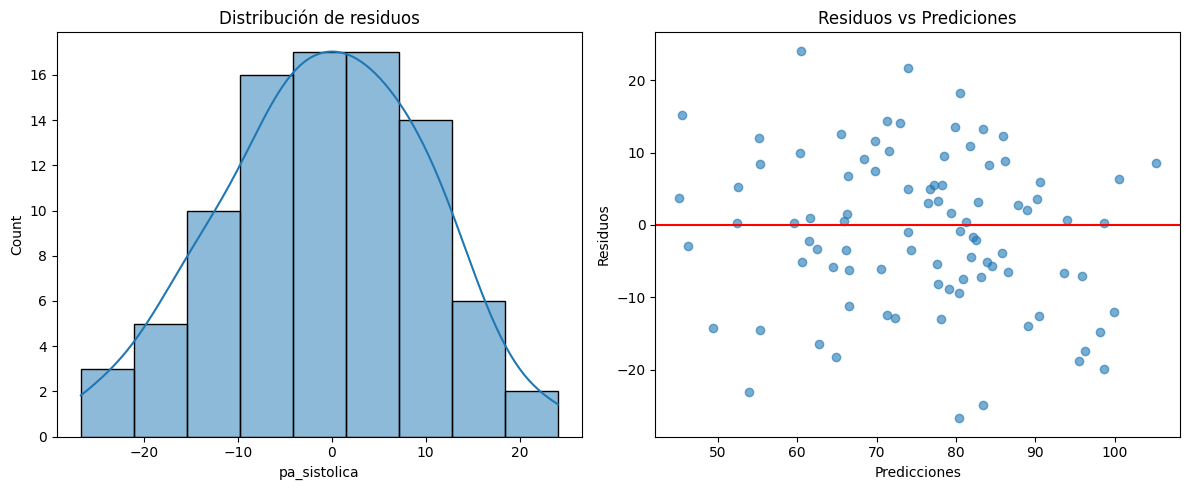

In [26]:
#6. ANÁLIIS DE RESIDUOS

residuos= y_test - y_pred_multi

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(residuos, kde=True)
plt.title('Distribución de residuos')

plt.subplot(1,2,2)
plt.scatter(y_pred_multi, residuos, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs Prediciones')
plt.tight_layout()
plt.show()




In [ ]:
#5. COMPARACIÓN DE MODELOS
print ('\nComparación de modelos:')
print('\nModelo\t\tr2\tMSE')
print("-"*40)

for predictor, res in resultados.items():
    print(f'{predictor}\t\t{res["r2"]:.4f}\t\t{res["mse"]:.2f}')
print(f'Múltiple\t\t{r2_multi:.4f}\t\t{mse_multi:.2f}')


Comparación de modelos:

Modelo		r2	MSE
----------------------------------------
edad		0.3046		179.19
imc		0.0008		257.47
colesterol		0.2150		202.29
Múltiple		0.5603		113.30
